In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import joblib
import mlem

In [7]:
# Leggo il dataframe e verifico i dati
csv_url = 'https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/Company.csv'

try:
    df = pd.read_csv(csv_url)
    df.info()
except: 
    print('Qualcosa non ha funzionato ricontrolla')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
# pulire dati 
'''
# trovare i tipi di dato non congruenti e sistemare
# eliminare valori NaN

...
..
.

'''
name_target_col: str = 'Sales'

In [12]:
# Feature
X = df.drop(columns=[name_target_col])

# Target 
y = df[name_target_col]

num_entries = y.size
print(f'Target:\n{y}; \nFeature: \n{X}; \nRighe: {num_entries}')


Target:
0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64; 
Feature: 
        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]; 
Righe: 200


In [13]:
# Suddivido il modello per poterlo poi testare
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
# Creo il file pickle e lo importo per controllare che funzioni correttamente
joblib.dump(model, 'sales.pkl')

modello = joblib.load('sales.pkl')

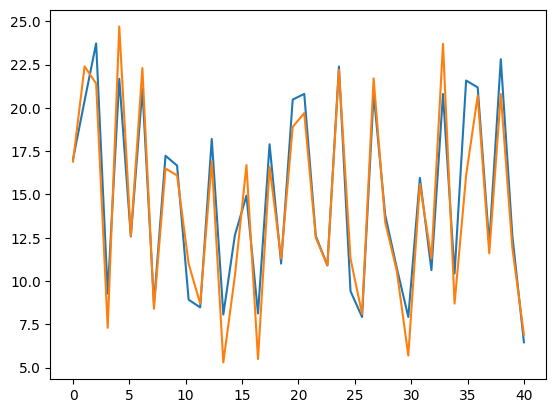

In [19]:
# Test modello 

pred = modello.predict(X_test)

# Verifica visuale con grafico
x = np.linspace(0, pred.size, pred.size)
plt.plot(x, pred)
plt.plot(x, y_test)


In [21]:
# Verifica con indicatori statistici 
trust = round(r2_score(y_test, pred) * 100)
if trust < 20:
    print('modello con bassa accuratezza, piuttosto butta na moneta')
else:
    print(f'il modello ha una accuratezza del {trust}%')

il modello ha una accuratezza del 91%
